# import necessary libary

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Dataset 

In [2]:
dataset = pd.read_csv('default.csv')

df = pd.DataFrame(dataset)

df

,Year,Average\nClosing Price,Year Open,Year High,Year Low,Year Close,Annual%Change
0,2022,$0.7311,$0.5642,$0.8820,$0.5642,$0.7012,24.15%
1,2021,$0.5775,$0.4213,$0.7208,$0.4170,$0.5648,32.61%
2,2020,$0.3127,$0.3524,$0.4259,$0.2499,$0.4259,22.70%
3,2019,$0.2932,$0.2818,$0.3534,$0.2661,$0.3471,24.90%
4,2018,$0.2993,$0.3355,$0.3390,$0.2696,$0.2779,-16.35%
...,...,...,...,...,...,...,...
57,1965,$0.1055,$0.1050,$0.1214,$0.0919,$0.1051,-3.93%
58,1964,$0.0900,$0.0827,$0.1232,$0.0756,$0.1094,31.97%
59,1963,$0.0896,$0.0863,$0.1025,$0.0765,$0.0829,-3.72%
60,1962,$0.0907,$0.1064,$0.1089,$0.0750,$0.0861,-18.85%


In [1]:
name = "Bangladesh"


# Preprocessing

In [4]:
# remove unnecessary columns
df = df.drop("Annual%Change", axis="columns")

In [5]:
df = df.drop("Average\nClosing Price", axis="columns")

In [6]:
#rename columns

df.rename(columns={
    "Year Open" : "Open", 
    "Year High" : "High",
    "Year Low" : "Low",
    "Year Close": "Close"
}, inplace=True)

In [7]:
#remove dollar symbol from dataframe

cols_to_check = ["Open", "High", "Low", "Close"]

for col in cols_to_check:
    df[col] = df[col].apply(lambda x : float(x[1:]) if x.startswith("$") else float(x))
    
print(df)

    Year    Open    High     Low   Close
0   2022  0.5642  0.8820  0.5642  0.7012
1   2021  0.4213  0.7208  0.4170  0.5648
2   2020  0.3524  0.4259  0.2499  0.4259
3   2019  0.2818  0.3534  0.2661  0.3471
4   2018  0.3355  0.3390  0.2696  0.2779
..   ...     ...     ...     ...     ...
57  1965  0.1050  0.1214  0.0919  0.1051
58  1964  0.0827  0.1232  0.0756  0.1094
59  1963  0.0863  0.1025  0.0765  0.0829
60  1962  0.1064  0.1089  0.0750  0.0861
61  1961  0.0946  0.1278  0.0944  0.1061

[62 rows x 5 columns]


In [8]:
df.dtypes

Year       int64
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [9]:
# consider data of last 12 years

df = df.head(13)

df

,Year,Open,High,Low,Close
0,2022,0.5642,0.8820,0.5642,0.7012
1,2021,0.4213,0.7208,0.4170,0.5648
2,2020,0.3524,0.4259,0.2499,0.4259
3,2019,0.2818,0.3534,0.2661,0.3471
4,2018,0.3355,0.3390,0.2696,0.2779
5,2017,0.3481,0.3607,0.3101,0.3322
6,2016,0.3012,0.3793,0.2918,0.3461
7,2015,0.3209,0.3478,0.2605,0.3071
8,2014,0.3880,0.4449,0.3128,0.3211
9,2013,0.5105,0.5311,0.3882,0.3907


# Graph Plot

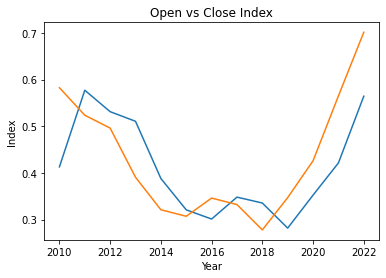

In [10]:
X_axis = df[['Year']].to_numpy()
Y_axis = df[['Open','Close']].to_numpy()

plt.plot(X_axis, Y_axis)

plt.title("Open vs Close Index")
plt.xlabel('Year')
plt.ylabel('Index')

plt.show()

In [11]:
data = df[['Open', 'High', 'Low']]
data

,Open,High,Low
0,0.5642,0.8820,0.5642
1,0.4213,0.7208,0.4170
2,0.3524,0.4259,0.2499
3,0.2818,0.3534,0.2661
4,0.3355,0.3390,0.2696
5,0.3481,0.3607,0.3101
6,0.3012,0.3793,0.2918
7,0.3209,0.3478,0.2605
8,0.3880,0.4449,0.3128
9,0.5105,0.5311,0.3882


In [12]:
X = data.to_numpy()
#X

In [13]:
y = df[["Close"]].to_numpy()
#y

# ANN from scratch with Back Propagation Algorithm

> <b>Back propagation is an algorithm that depends on `mean square error` to optimize the accuracy with sigmoid function.</b>

<b>sigmoid function:</b> 
```
S(x) = \frac {1}{1+e^{-x}}
S(x) = sigmoid function
e    = Euler's number
```

In [14]:
class NeuralNetwork(object):
    def __init__(self, hiddenLayer):
        #parameters
        self.inputSize = 3
        self.outputSize = 1
        self.hiddenSize = hiddenLayer
        
        #weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (2x1) weight matrix from hidden to output layer
        
    def feedForward(self, X):
        #forward propogation through the network
        self.z = np.dot(X, self.W1) #dot product of X (input) and first set of weights (3x2)
        self.z2 = self.sigmoid(self.z) #activation function
        self.z3 = np.dot(self.z2, self.W2) #dot product of hidden layer (z2) and second set of weights (3x1)
        output = self.sigmoid(self.z3)
        return output
        
    def sigmoid(self, s, deriv=False):
        if (deriv == True):
            return s * (1 - s)
        return 1/(1 + np.exp(-s))
    
    def backward(self, X, y, output):
        #backward propogate through the network
        self.output_error = y - output # error in output
        self.output_delta = self.output_error * self.sigmoid(output, deriv=True)
        
        self.z2_error = self.output_delta.dot(self.W2.T) #z2 error: how much our hidden layer weights contribute to output error
        self.z2_delta = self.z2_error * self.sigmoid(self.z2, deriv=True) #applying derivative of sigmoid to z2 error
        
        self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input -> hidden) weights
        self.W2 += self.z2.T.dot(self.output_delta) # adjusting second set (hidden -> output) weights
        
    def train(self, X, y):
        output = self.feedForward(X)
        self.backward(X, y, output)
    

In [15]:
def test(hiddenLayer):
    NN = NeuralNetwork(hiddenLayer)

    epoch = 1000

    for i in range(epoch): #trains the NN 1000 times
        if (i % 100 == 0):
            print("Loss: " + str(np.mean(np.square(y - NN.feedForward(X)))))
        NN.train(X, y)

In [16]:
test(hiddenLayer = 4)

Loss: 0.09190161234203281
Loss: 0.007888574941415443
Loss: 0.0032954334437021796
Loss: 0.0020628215362258587
Loss: 0.0017374472599685205
Loss: 0.001633340391269266
Loss: 0.001592434018793621
Loss: 0.0015739379806076377
Loss: 0.0015647491836531266
Loss: 0.0015596700074340468


# Accuracy & MSE(Mean Square Error)

In [17]:
# Dividing the dataset into target variable and features
X=df[['Open', 'High', 'Low']].to_numpy()
y=df[['Close']].to_numpy()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=4)

In [19]:
learning_rate = 0.1
iterations = 50
N = y_train.size
 
# Input features
input_size = 3
 
# Hidden layers 
hidden_size = 2
 
# Output layer
output_size = 1 
 
results = pd.DataFrame(columns=["mse", "accuracy"])

In [20]:
np.random.seed(10)

# Hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   
 
# Output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

# necessary functions

In [21]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
 
def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
     
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()


# model validation

In [22]:
for itr in range(iterations):    
     
    # Implementing feedforward propagation on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)
 
    # Implementing feed forward propagation on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
     
     
    # Calculating the error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
     
    # Backpropagation phase
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)
 
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)
 
    # Updating the weights
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N
 
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

/var/folders/b4/9xgk8tdx4xq75mxznw0prk7c0000gp/T/ipykernel_20647/2315709744.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/b4/9xgk8tdx4xq75mxznw0prk7c0000gp/T/ipykernel_20647/2315709744.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/b4/9xgk8tdx4xq75mxznw0prk7c0000gp/T/ipykernel_20647/2315709744.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/b4/9xgk8tdx4xq75mxznw0prk7c0000gp/T/ipykernel_20647/2315709744.py:15: FutureWarning: The frame.append method is deprecat

# Graph Plotting

<AxesSubplot:title={'center':'Mean Squared Error'}>

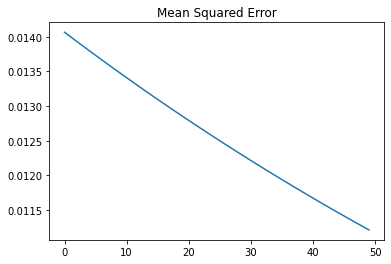

In [23]:
results.mse.plot(title="Mean Squared Error")

<AxesSubplot:title={'center':'Accuracy'}>

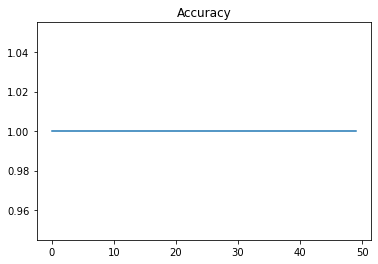

In [24]:
results.accuracy.plot(title="Accuracy")

In [25]:
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)
 
Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)
 
acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 1.0


You can see the accuracy of the model have been significantly increased to 100%.
